link - https://app.datacamp.com/learn/skill-tracks/time-series-with-python
[pd.Timestamp](#Section1)<br>
[pd.Period](#Section2)<br>
[to create time series we need sequence of dates](#Section3)<br>
[Create a time series : pd.DatetimeIndex](#Section4)<br>
[Indexing & Resampling time series](#Section5)<br>
[Lags, changes, and returns for stock price series](#Section6)<br>

In [1]:
import pandas as pd
from datetime import datetime

<a name = Section1></a>
### pd.Timestamp

In [9]:
# to manualy create timestamp & date
time_stamp = pd.Timestamp(datetime(2022,9,8))   #yyyy,dd,mm

In [10]:
time_stamp

Timestamp('2022-09-08 00:00:00')

In [5]:
time_stamp.year

2022

In [91]:
time_stamp.day_of_week

3

In [11]:
time_stamp.day_name()

'Thursday'

In [12]:
time_stamp.month_name()

'September'

<a name = Section2></a>
### pd.Period

In [13]:
period = pd.Period('2022-02')  # default month-end

In [14]:
period

Period('2022-02', 'M')

In [16]:
# to convert from Month end to Daily frequency
period.asfreq('D')

Period('2022-02-28', 'D')

In [17]:
# convert pd.Period() to pd.Timestamp() and viceversa
period.to_timestamp().to_period('M')

Period('2022-02', 'M')

In [18]:
# adding months to your period from feb to april
period + 2

Period('2022-04', 'M')

<a name = Section3></a>
### to create time series we need sequence of dates
**pd.date_range : start, end, periods, freq**
- need to specify either start date or end date

In [66]:
index = pd.date_range(start= '2022-01-01', periods=11, freq='M')  

In [67]:
index

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30'],
              dtype='datetime64[ns]', freq='M')

In [68]:
index[1]

Timestamp('2022-02-28 00:00:00', freq='M')

In [69]:
index.to_period()

PeriodIndex(['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
             '2022-07', '2022-08', '2022-09', '2022-10', '2022-11'],
            dtype='period[M]')

<a name = Section4></a>
### Create a time series : pd.DatetimeIndex

In [70]:
df = pd.DataFrame({'date': index}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    11 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 216.0 bytes


In [71]:
import numpy as np

In [75]:
data = np.random.random(size=(11,2))

In [76]:
data

array([[0.1978261 , 0.98043984],
       [0.2038735 , 0.43483873],
       [0.68845278, 0.66108273],
       [0.00391957, 0.22521112],
       [0.18966581, 0.31421887],
       [0.9414503 , 0.45883111],
       [0.78068023, 0.85070883],
       [0.59715875, 0.0351618 ],
       [0.8404503 , 0.70387269],
       [0.40501285, 0.36129814],
       [0.83847003, 0.05302867]])

In [77]:
df = pd.DataFrame(data = data, index=index).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 2022-01-31 to 2022-11-30
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       11 non-null     float64
 1   1       11 non-null     float64
dtypes: float64(2)
memory usage: 264.0 bytes


In [81]:
# create date range of seven days
seven_days = pd.date_range(start ='2017-1-1',periods=7,freq='D')

In [82]:
seven_days

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07'],
              dtype='datetime64[ns]', freq='D')

In [92]:
# Iterate over each date in seven_days and in each iteration, print the .dayofweek and .day_name() attributes.

for day in seven_days:
    print(day.day_of_week, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


<a name = Section5></a>
### Indexing & Resampling time series
- convert column of datatype in dataframe = sting to datetime format using **pd.to_datetime()**
- .asfreq('D') = calendar day frequency
- .asfreq('B') = Business day frequency

In [ ]:
# Convert the date column to datetime64
data['date'] = pd.to_datetime(data['date'])

In [93]:
prices = pd.DataFrame()

In [95]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [ ]:
co = co.asfreq('D')

<a name = Section6></a>
### Lags, changes, and returns for stock price series

you will learn how to move your data across time so that you can compare values at different points in time. This involves shifting values into the future, or creating lags by moving data into the past. You will also learn how to calculate changes between values at different points in time. Lastly, you will see how to calculate the change between values in percentage terms, also called the rate of growth.

- we use pd.read_csv() to read data
- .shift() = Your first time series method is dot-shift. It allows you to move all data in a Series or DataFrame into the past or future.

In [ ]:
google = pd.read_csv('google.csv',parse_dates=True,index_col='Date') 
# or
google = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')


# .shift() :which allows you shift all values in a Series or DataFrame by a number of periods to a different time
datafr['abc'] = datafr['abc'].shift()    # defaults to periods = 1
# the first value in the series is now missing.

datafr['abc'] = datafr['abc'].shift(periods=-1)  # it moves into past
# In this case, the last value is now missing.

# how to calculate
datafr['newcol'] = datafr['chang'].sub(1).mul(100)

# .diff(): built-in time-series change
datafr['diff'] = datafr['price'].diff()

# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(periods=30, freq='B')

yahoo.info()

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo['price']-yahoo['shifted_30']

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(periods=30)

# Inspect the last five rows of price
print(yahoo.tail())

# Show the value_counts of the difference between change_30 and diff_30
yahoo['val_cou'] = yahoo['change_30'].sub(yahoo['diff_30'])

print(yahoo['val_cou'].value_counts())


# Create daily_return
google['daily_return'] = google.Close.pct_change(periods=1).mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(periods=30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(periods=360).mul(100)

# Plot the result
google.plot(subplots=True)
plt.show()


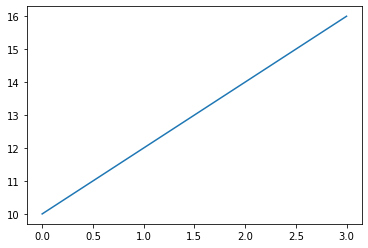

In [96]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot([10, 12, 14, 16])
plt.show()

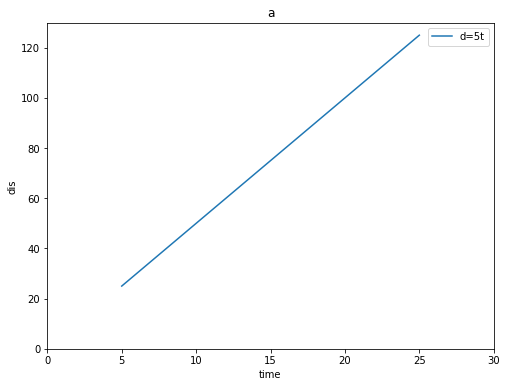

In [98]:
import matplotlib.pyplot as plt

def test():
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    t = [5,10,15,20,25]
    d = [25,50,75,100,125]
    plt.plot(t,d,label='d=5t')
    ax.set(title='a',xlabel='time', ylabel='dis', xlim=(0,30), ylim=(0,130))
    plt.legend()
    plt.savefig('scatter.png')
    plt.show()
    
test()